In [39]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
class Particle:
    def __init__(self, dimension, l_bound, h_bound):

        self.position = [random.uniform(l_bound, h_bound) for _ in range(dimension)]

        vmax = 0.1 * (h_bound - l_bound)
        self.velocity = [random.uniform(-vmax, vmax) for _ in range(dimension)]

        self.p_best = self.position.copy()
        self.g_best = None

        self.fitness = float('inf')
        self.b_fitness = float('inf')


    def calc_new_velocity(self, r1, r2, a_co1, a_co2):

        cog_component = [r1 * a_co1 * (p - x) for p, x in zip(self.p_best, self.position)]

        soc_component = [r2 * a_co2 * (g - x) for g, x in zip(self.g_best, self.position)]

        self.velocity = [v + c + s for v, c, s in zip(self.velocity, cog_component, soc_component)]

    
    def calc_new_position(self, r1, r2, a_co1, a_co2):

        self.calc_new_velocity(r1, r2, a_co1, a_co2)

        self.position = [x + v for x, v in zip(self.position, self.velocity)]
        

In [42]:
def PSO(dimension, fitness, swarm_size, l_bound, h_bound, a_co1, a_co2, max_iter=100):

    rnd = random.Random(0)
    swarm = [Particle(dimension, l_bound, h_bound) for _ in range(swarm_size)]

    best_fitnesses = []

    best_position = None
    best_fitness = float('inf')  # minimize fitness

    for _ in range(max_iter):
        for particle in swarm:
            particle.fitness = fitness(particle.position)

            # Update personal best
            if (particle.p_best is None) or (particle.fitness < particle.b_fitness):
                particle.p_best = particle.position.copy()
                particle.b_fitness = particle.fitness

            # Update global best
            if (best_position is None) or (particle.fitness < best_fitness):
                best_position = particle.position.copy()
                best_fitness = particle.fitness
            

        # Update velocities and positions
        for particle in swarm:
            particle.g_best = best_position.copy()
            r1 = rnd.random()
            r2 = rnd.random()
            particle.calc_new_position(r1, r2, a_co1, a_co2)
        
        # Logs best fitness for logging
        best_fitnesses.append(best_fitness)

    return (best_position, best_fitness, best_fitnesses)


In [15]:


def rosenbrock_fitness(x):
    D = len(x)

    total = 0.0
    
    for i in range(D-1):
        total += 100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
    return total

def griewank_fitness(x):

    sum_term = sum(xi**2 / 4000 for xi in x)

    prod_term = 1.0

    for i, xi in enumerate(x, start=1):
        prod_term *= math.cos(xi / math.sqrt(i))
    return sum_term - prod_term + 1

In [43]:
def plot_fitness(fitnesses, title="Fitness Over Epochs"):
    plt.figure(figsize=(10, 6))
    plt.plot(fitnesses, label="Fitness")
    plt.xlabel("Epoch")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

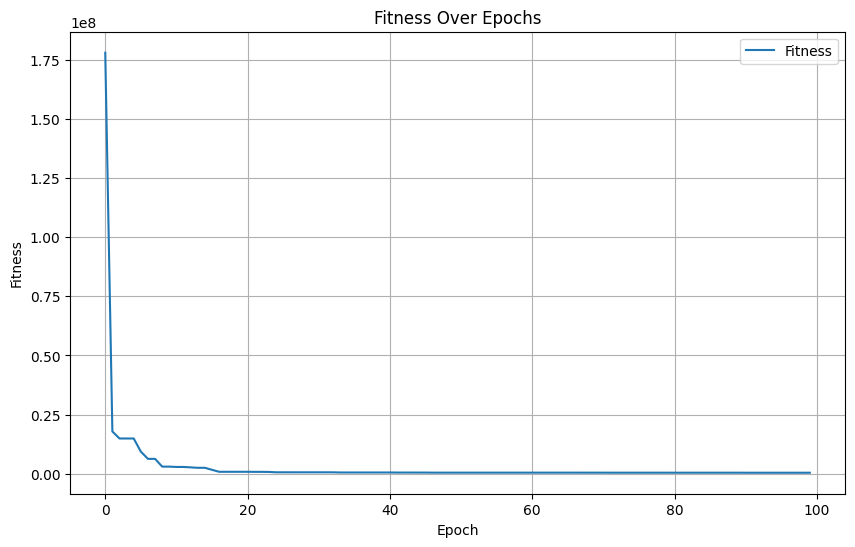

In [ ]:
(best_position, best_fitness, best_fitnesses)  = PSO(20,rosenbrock_fitness, 50, -30, 30, 0.5,1)

plot_fitness(best_fitnesses)